# Frisk Analysis
We will examine the frisk.csv dataset which has recordings of NYPD stop-and-frisk from 1998-1999.

Variables in the dataset:
+ precint: [NYC precint](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz) indicator, with values 1, 2, . . . , 75. 
+ eth: Ethnicity indicator, with 1 denoting Black, 2 denoting Hispanic, and 3 denoting White.
+ popl: The total population of a particular ethnicity in a given precint. 
+ crime: Crime category indicator, with 1 denoting violent crimes, 2 denoting weapons crimes, 3 denoting property crimes, and 4 denoting drug crimes.
+ stops: Number of police stops for a specific crime category among individuals of a particular ethnicity in a given precint. 
+ past: The total number of past arrests for a specific crime category among individuals of a particular ethnicity in a given precint.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [3]:
eth_map = ['misc','black','hispanic','white']

In [5]:
df = pd.read_csv('frisk.csv')
frisk = df.drop('crime', 1).groupby(['precinct', 'eth', 'popl'])[['stops', 'past']].sum().reset_index()
frisk.head(10)

,precinct,eth,popl,stops,past
0,1,1,1720,202,980
1,1,2,1368,102,295
2,1,3,23854,81,381
3,2,1,2596,132,753
4,2,2,6844,144,557
5,2,3,9379,71,431
6,3,1,2092,752,2188
7,3,2,3633,441,627
8,3,3,56304,410,1238
9,4,1,5699,385,471


In [7]:
mod = smf.ols(formula="stops~popl-1", data=frisk)
slope = mod.fit().params[0]
slope

0.013380758804351547

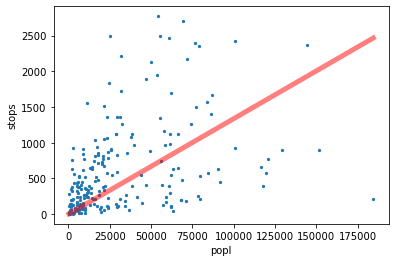

In [8]:
s_plot1 = frisk.plot(x='popl', y='stops', kind='scatter', s=5)
xmin, xmax = frisk.popl.min(), frisk.popl.max()
x = np.arange(xmin, xmax)
s_plot1.plot(x, x*slope, color='red', alpha=0.5, linewidth=5)

In [9]:
mod = smf.ols(formula="stops~popl", data=frisk)
intercept = mod.fit().params[0]
slope = mod.fit().params[1]
print(intercept, slope)

339.5071828319832 0.008124416863261274


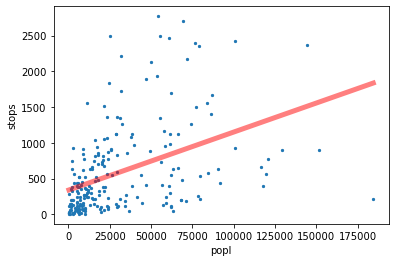

In [10]:
s_plot2 = frisk.plot(x='popl', y='stops', kind='scatter', s=5)
xmin, xmax = frisk.popl.min(), frisk.popl.max()
x = np.arange(xmin, xmax)
s_plot2.plot(x, x*slope + intercept, color='red', alpha=0.5, linewidth=5)

In [11]:
mod = smf.ols(formula="stops~past", data=frisk)
intercept = mod.fit().params[0]
slope = mod.fit().params[1]
print(intercept, slope)

159.19671005071206 0.40416481103999663


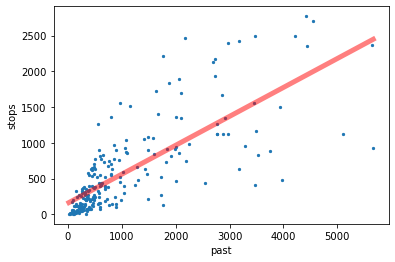

In [12]:
s_plot3 = frisk.plot(x='past', y='stops', kind='scatter', s=5)
xmin, xmax = frisk.past.min(), frisk.past.max()
x = np.arange(xmin, xmax)
s_plot3.plot(x, x * slope + intercept, color='red', alpha=0.5, linewidth=5)

In [13]:
mod = smf.ols(formula="stops~popl+past", data=frisk)
intercept = mod.fit().params[0]
slope_popl = mod.fit().params[1]
slope_past = mod.fit().params[2]
print(intercept, slope_popl, slope_past)

104.50123130776086 0.0029405879731054015 0.3719855811910127


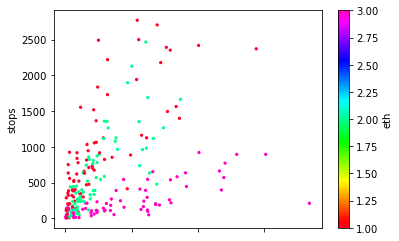

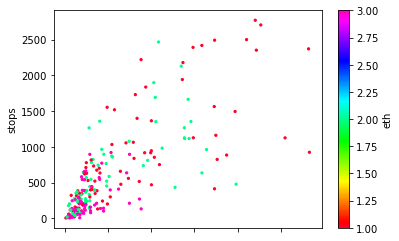

In [14]:
s_plot4 = frisk.plot(x='popl', y='stops', kind='scatter', s=5, c='eth', colormap='gist_rainbow')
s_plot5 = frisk.plot(x='past', y='stops', kind='scatter', s=5, c='eth', colormap='gist_rainbow')

In [16]:
eth_count = (frisk.groupby(['eth'])[['stops', 'popl', 'past']]
             .sum().rename(index={1: 'black', 2: 'hispanic', 3: 'white'}))
eth_count

,stops,popl,past
eth,,,
black,69823,1865895,125719
hispanic,44623,1732269,74898
white,16974,3175354,35922


In [18]:
eth_prop = eth_count.apply(lambda x: x/x.sum())
eth_prop

,stops,popl,past
eth,,,
black,0.531297,0.275469,0.531494
hispanic,0.339545,0.255741,0.316641
white,0.129158,0.468789,0.151865


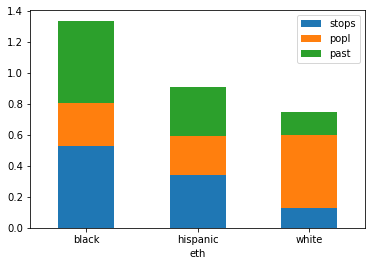

In [19]:
b_plot1 = eth_prop.plot.bar(rot=0, stacked=True)

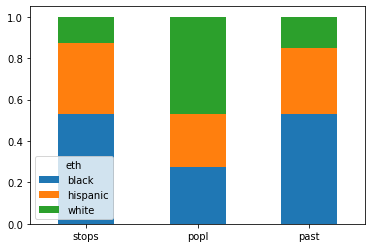

In [20]:
b_plot2 = eth_prop.T.plot.bar(rot=0, stacked=True)

In [21]:
mod_black = smf.ols(formula="stops~popl+past-1", data=frisk[frisk['eth'] == 1])
black_popl = mod_black.fit().params[0]
black_past = mod_black.fit().params[1]

mod_hispanic = smf.ols(formula="stops~popl+past-1", data=frisk[frisk['eth'] == 2])
hisp_past = mod_hispanic.fit().params[0]
hisp_popl = mod_hispanic.fit().params[1]

mod_white = smf.ols(formula="stops~popl+past-1", data=frisk[frisk['eth'] == 3])
white_past = mod_white.fit().params[0]
white_popl = mod_white.fit().params[1]

print(black_popl, black_past, hisp_past, hisp_popl, white_past, white_popl)

0.013459761357059225 0.2769406088216727 0.018770698963234668 0.10516913201638943 0.003801946125210906 0.137792403733428


These results are the coefficients for the ethnic population and ethnic past crimes. They establish a relationship to the total number of stops and are fitted to pass through the origin.

In [22]:
frisk['black'] = frisk['eth'].apply(lambda x: 1 if x == 1 else 0)
frisk['hispanic'] = frisk['eth'].apply(lambda x: 1 if x == 2 else 0)
frisk['white'] = frisk['eth'].apply(lambda x: 1 if x == 3 else 0)
mod = smf.ols(formula="stops~popl+past+black+hispanic", data=frisk).fit().params
print(mod)
intercept = mod[0]
slope_popl = mod[1]
slope_past = mod[2]
slope_black = mod[3]
slope_hisp = mod[4]

Intercept   -156.289946
popl           0.006039
past           0.265046
black        492.745874
hispanic     347.103798
dtype: float64


The coefficients in our regression tells us the general weighting of each of the given variables and how much it would result in stops. For example, the coefficient for population (0.006) shows us that there is very small increase on the number of stops as the population increases. On the other hand, it shows that there is a very high increase in stops as the number of the black or hispanic people increase.

In [23]:
func = lambda x: np.log(0.001 + x) if np.log(x) == 1 else np.log(x)
frisk['logstops'] = frisk['stops'].apply(func)
frisk['logpast'] = frisk['past'].apply(func)
frisk['logpopl'] = frisk['popl'].apply(func)
mod = smf.ols(formula="logstops~logpopl+logpast", data=frisk).fit().params
intercept = mod[0]
slope_logpopl = mod[1]
slope_logpast = mod[2]

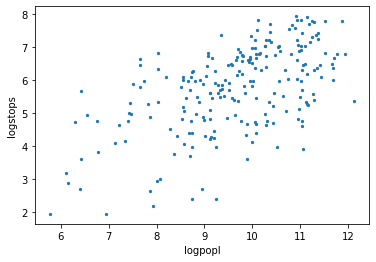

In [24]:
log_plot = frisk.plot(x='logpopl', y='logstops', kind='scatter', s=5)

# Cross-validation

In [25]:
params1, params2, params3, params4, params5 = [], [], [], [], []
sse1, sse2, sse3, sse4, sse5 = [], [], [], [], []
for i in range(15):
    start, end = i * 15, (i + 1) * 15
    test = frisk[start:end]
    train = frisk.drop(test.index[:])

    mod1 = smf.ols(formula="stops~popl", data=train).fit()
    sse1.append(sum((test['stops'] - mod1.predict(test)) ** 2))
    params1.append(mod1.params)

    mod2 = smf.ols(formula="stops~past", data=train).fit()
    sse2.append(sum((test['stops'] - mod2.predict(test)) ** 2))
    params2.append(mod2.params)

    mod3 = smf.ols(formula="stops~popl+past", data=train).fit()
    sse3.append(sum((test['stops'] - mod3.predict(test)) ** 2))
    params3.append(mod3.params)

    mod4 = smf.ols(formula="stops~popl+past+black+hispanic", data=train).fit()
    sse4.append(sum((test['stops'] - mod4.predict(test)) ** 2))
    params4.append(mod4.params)

    mod5 = smf.ols(formula="logstops~logpopl+logpast", data=train).fit()
    sse5.append(sum((test['stops'] - np.exp(mod5.predict(test))) ** 2))
    params5.append(mod5.params)

crossval1 = pd.DataFrame(params1)
crossval1['SSE'] = sse1

crossval2 = pd.DataFrame(params2)
crossval2['SSE'] = sse2

crossval3 = pd.DataFrame(params3)
crossval3['SSE'] = sse3

crossval4 = pd.DataFrame(params4)
crossval4['SSE'] = sse4

crossval5 = pd.DataFrame(params5)
crossval5['SSE'] = sse5

<AxesSubplot:title={'center':'SSE'}, xlabel='[Model]'>

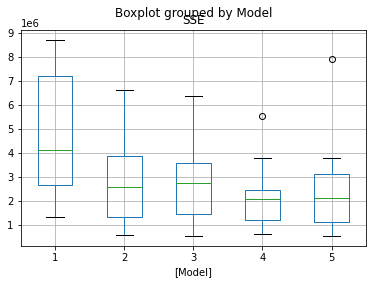

In [26]:
model1 = crossval1.drop(columns=['Intercept', 'popl']).assign(Model=1)
model2 = crossval2.drop(columns=['Intercept', 'past']).assign(Model=2)
model3 = crossval3.drop(columns=['Intercept', 'popl', 'past']).assign(Model=3)
model4 = crossval4.drop(columns=['Intercept', 'popl', 'past', 'black', 'hispanic']).assign(Model=4)
model5 = crossval5.drop(columns=['Intercept', 'logpopl', 'logpast']).assign(Model=5)
all_crossval = pd.concat([model1, model2, model3, model4, model5])
all_crossval.boxplot(by='Model')

From best predictive performance to lowest predictive performance, the model ordering is 4, 5, 2, 3, and 1. The main criterias I used to find the order was looking at the median, IQR, and accounting for outliers. Between 4 and 5, they appeared to have the lowest sse median but 4 had a tigher IQR and a lower outlier. This is why I picked 4 as the best predictor. I applied this method to the rest of the models. Model 1 has the least predictive performace because it has the highest median and the highest IQR. This basically shows that the sse values are going all over the place and unable to make an accurate prediction in stops.

,black,hispanic
count,15.000000,15.000000
mean,491.861998,346.578121
std,19.478170,16.489292
min,455.781902,318.326872
25%,482.218135,334.868262
50%,487.187266,341.238642
75%,507.122379,360.467200
max,525.430667,373.690442


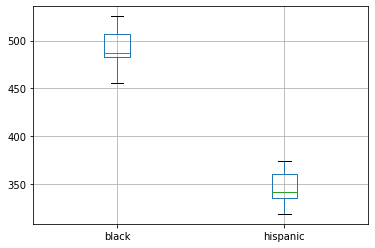

In [27]:
black_hispanic = crossval4.drop(columns=['Intercept', 'popl', 'past', 'SSE'])
black_hispanic.boxplot(column=['black', 'hispanic'])
black_hispanic.describe()

From our given plots and description, it appears the estimates do vary across different folds. For the black ethnicity, there is an std of 19 while it is 16 for hispanic. This shows the amount of variance between the 15 folds. From the boxplot we can also see the IQR which gives us the general range of the coefficent estimates, which means that the estimates do vary across different folds.